##### Apriori & Associative Rules
###### Date: 3d July, 2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

In [2]:
dataset = pd.read_csv("Groceries_dataset.csv")
dataset.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:

#################################
print(dataset.head())
print(dataset.shape)
#################################
nan_values = dataset.isna().sum()
print(nan_values)

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
(38765, 3)
Member_number      0
Date               0
itemDescription    0
dtype: int64


In [28]:
##Basket analysis: we can see the bought products of clients for every day
client_basket=dataset.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
#print(client_basket)
## we can see the bought products of clients for every day withot client number
clinet_basket2 = [a[1]['itemDescription'].tolist() for a in list(dataset.groupby(['Member_number','Date']))]
#print(clinet_basket2[0:10])

/var/folders/cr/5jcyqtbj695fsfwff1yqr_bc0000gn/T/ipykernel_2912/2889546092.py:2: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  client_basket=dataset.groupby(['Member_number','Date'])['itemDescription'].apply(sum)


In [29]:
#Converting Date into datetime type
Date=dataset.set_index(['Date'])
Date.index=pd.to_datetime(Date.index, infer_datetime_format= True)

/var/folders/cr/5jcyqtbj695fsfwff1yqr_bc0000gn/T/ipykernel_2912/348960546.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Date.index=pd.to_datetime(Date.index, infer_datetime_format= True)
/var/folders/cr/5jcyqtbj695fsfwff1yqr_bc0000gn/T/ipykernel_2912/348960546.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Date.index=pd.to_datetime(Date.index, infer_datetime_format= True)


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

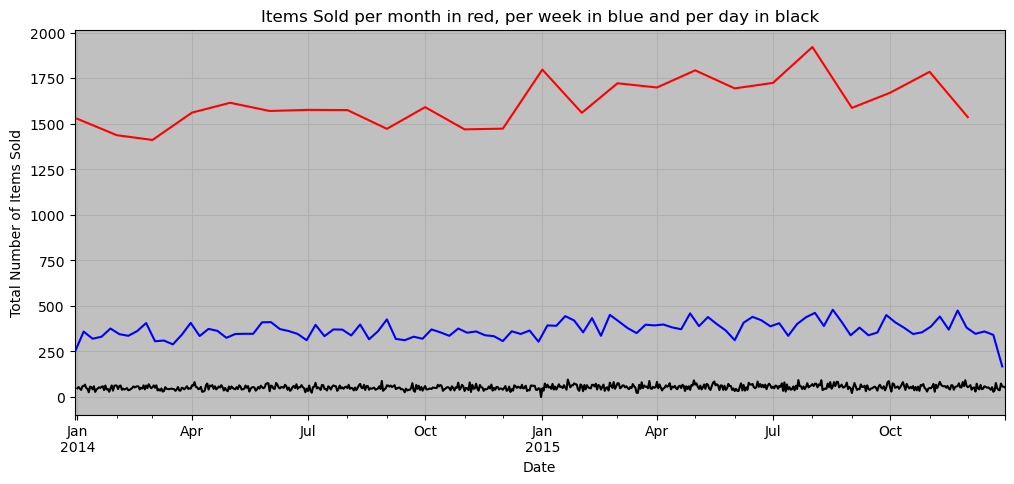

In [30]:
## data analysis
#Items Sold 
fig1 = plt.figure("Figure 1")
ax = plt.axes()
ax.set_facecolor('silver')
Date.resample("D")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='black').set(xlabel="Date", ylabel="Total Number of Items Sold")
Date.resample("W")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Total Number of Items Sold")
Date.resample("M")['itemDescription'].count().plot(figsize=(12,5), grid=True,
color='red',title="Items Sold per month in red, per week in blue and per day in black").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

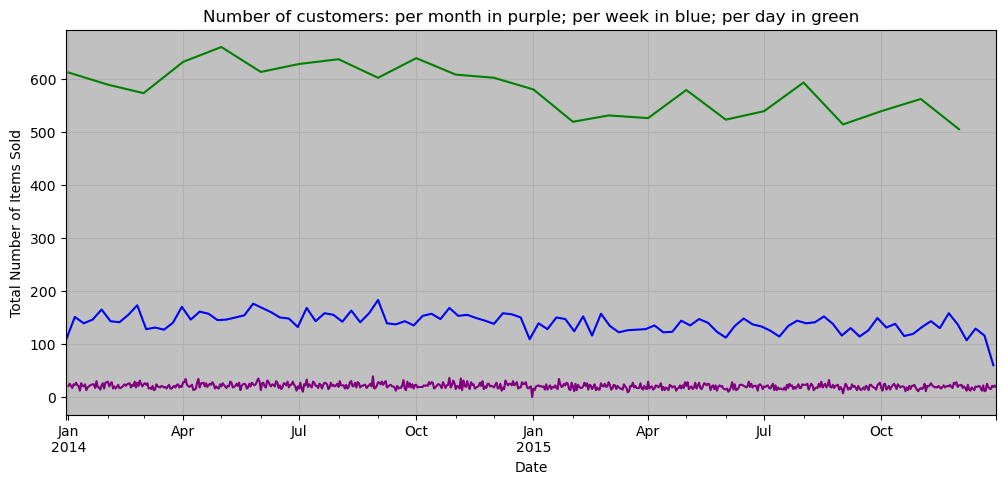

In [31]:
#Number of customers
fig2 = plt.figure("Figure 2")
ax = plt.axes()
ax.set_facecolor('silver')
Date.resample('D')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='purple').set(xlabel="Date", ylabel="Number of customers")
Date.resample('W')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Number of customers")
Date.resample('M')['Member_number'].nunique().plot(figsize=(12,5), grid=True,
color='green',title="Number of customers: per month in purple; per week in blue; per day in green").set(xlabel="Date", ylabel="Total Number of Items Sold")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Sale per customer')]

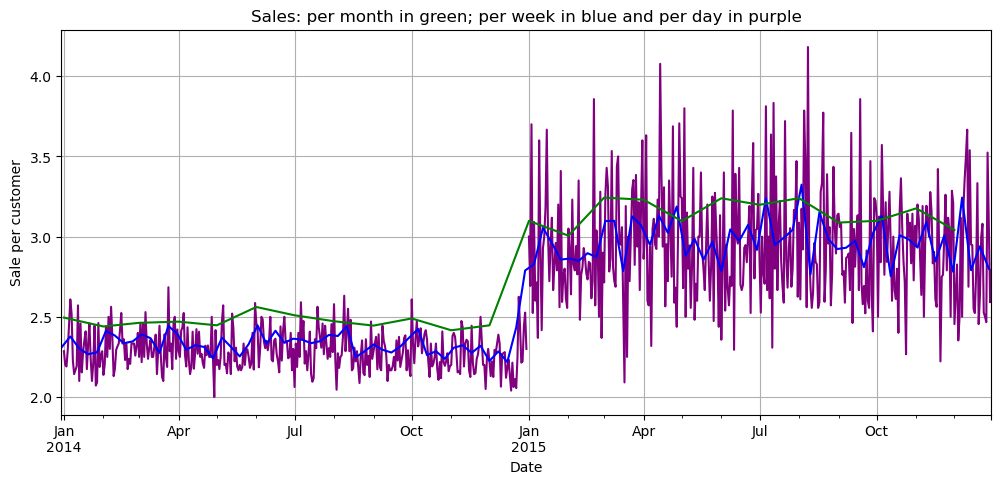

In [32]:
#sale per customer
fig3 = plt.figure("Figure 3")
ax = plt.axes()
day_ratio = Date.resample("D")['itemDescription'].count()/Date.resample('D')['Member_number'].nunique()
day_ratio.plot(figsize=(12,5), grid=True,
color='purple').set(xlabel="Date", ylabel="Sale per customer")
week_ratio = Date.resample("W")['itemDescription'].count()/Date.resample('W')['Member_number'].nunique()
week_ratio.plot(figsize=(12,5), grid=True,
color='blue').set(xlabel="Date", ylabel="Sale per customer")
month_ratio = Date.resample("M")['itemDescription'].count()/Date.resample('M')['Member_number'].nunique()
month_ratio.plot(figsize=(12,5), grid=True,
color='green', title = "Sales: per month in green; per week in blue and per day in purple").set(xlabel="Date", ylabel="Sale per customer")


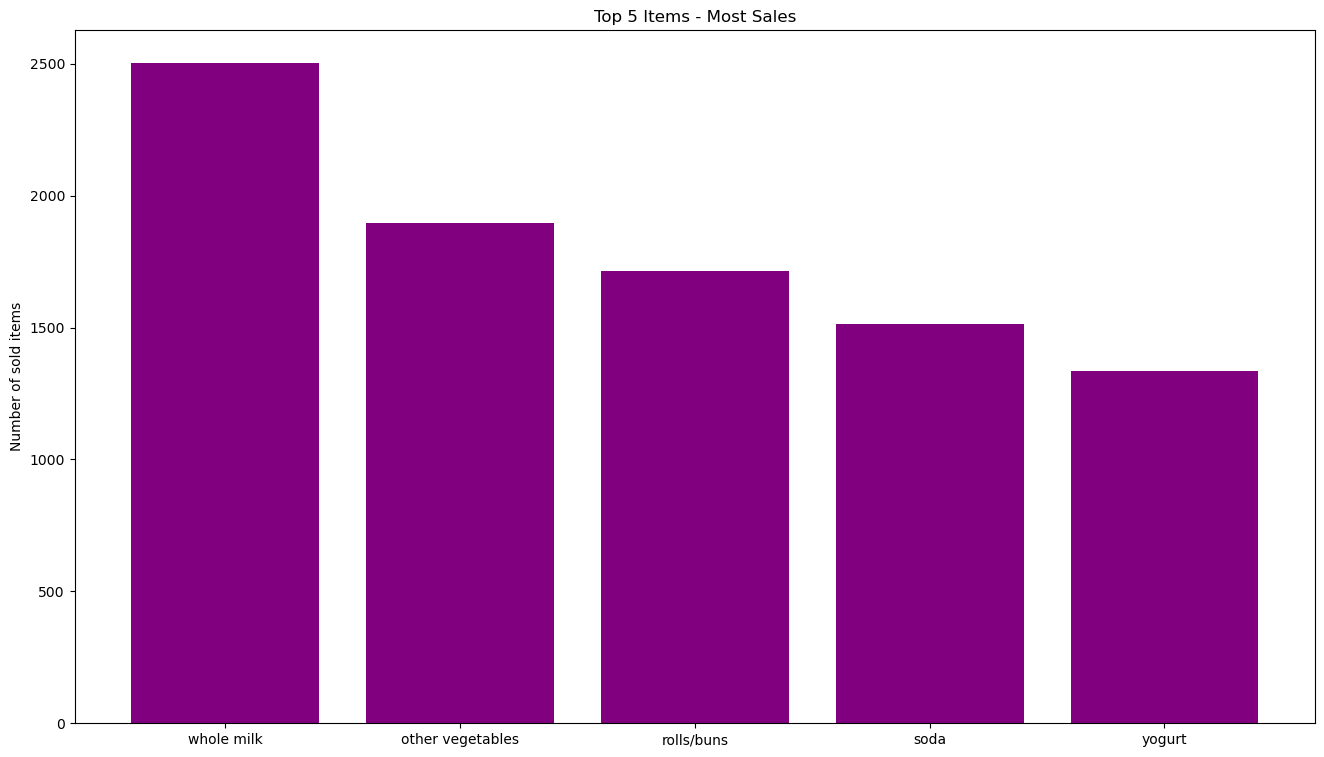

In [33]:
#5 best seller items 
Item_distr = dataset.groupby(by = 'itemDescription').size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(5)
bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color = 'purple')
plt.title("Top 5 Items - Most Sales")
plt.ylabel("Number of sold items")
plt.xticks(x_pos, bars)
plt.show()

In [34]:
## Data preaparation and modeling
## before modeling, transcastion must be one-hot
Transactions = dataset.groupby(['Member_number', 'itemDescription'])['itemDescription'].count().unstack().fillna(0).reset_index()
Transactions.head()
def one_hot_encoder(k):
    if k <= 0:
        return 0
    if k >= 1:
        return 1
Transactions = Transactions.iloc[:, 1:Transactions.shape[1]].applymap(one_hot_encoder)
# Transactions.head()



/var/folders/cr/5jcyqtbj695fsfwff1yqr_bc0000gn/T/ipykernel_2912/239896435.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Transactions = Transactions.iloc[:, 1:Transactions.shape[1]].applymap(one_hot_encoder)


In [35]:
#Apriori/mlxtend: 
frequent_items1 = apriori(Transactions, 
                          min_support=0.027, 
                          use_colnames=True, max_len=3).sort_values(by='support')
frequent_items1.head(10)

/opt/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
256,0.027193,"(other vegetables, ham)"
344,0.027193,"(sugar, rolls/buns)"
230,0.027193,"(pip fruit, frankfurter)"
426,0.027193,"(other vegetables, whole milk, margarine)"
218,0.027193,"(dessert, yogurt)"
206,0.027193,"(pastry, curd)"
179,0.027193,"(citrus fruit, fruit/vegetable juice)"
266,0.027450,"(long life bakery product, rolls/buns)"
276,0.027450,"(misc. beverages, whole milk)"
279,0.027450,"(soda, napkins)"


In [36]:

results1 = association_rules(frequent_items1, 
                             metric="lift", 
                             min_threshold=1).sort_values('lift', ascending=False)
results1 = results1[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
results1.head(10)

,antecedents,consequents,support,confidence,lift
627,(sausage),"(rolls/buns, yogurt)",0.035659,0.173101,1.554717
626,"(rolls/buns, yogurt)",(sausage),0.035659,0.320276,1.554717
216,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
221,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
629,(yogurt),"(sausage, rolls/buns)",0.035659,0.126020,1.530298
624,"(sausage, rolls/buns)",(yogurt),0.035659,0.433022,1.530298
693,"(other vegetables, yogurt)",(sausage),0.037199,0.309168,1.500795
696,(sausage),"(other vegetables, yogurt)",0.037199,0.180573,1.500795
377,(shopping bags),"(soda, other vegetables)",0.031042,0.184451,1.485518
372,"(soda, other vegetables)",(shopping bags),0.031042,0.250000,1.485518


In [37]:

##associate learning 1: apriori
frequent_items1 = apriori(Transactions, 
                          min_support=0.027, 
                          use_colnames=True, max_len=3).sort_values(by='support')
frequent_items1.head(10)

/opt/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
256,0.027193,"(other vegetables, ham)"
344,0.027193,"(sugar, rolls/buns)"
230,0.027193,"(pip fruit, frankfurter)"
426,0.027193,"(other vegetables, whole milk, margarine)"
218,0.027193,"(dessert, yogurt)"
206,0.027193,"(pastry, curd)"
179,0.027193,"(citrus fruit, fruit/vegetable juice)"
266,0.027450,"(long life bakery product, rolls/buns)"
276,0.027450,"(misc. beverages, whole milk)"
279,0.027450,"(soda, napkins)"


In [38]:

results1 = association_rules(frequent_items1, 
                             metric="lift", 
                             min_threshold=1).sort_values('lift', ascending=False)
results1 = results1[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
results1.head(100)

,antecedents,consequents,support,confidence,lift
627,(sausage),"(rolls/buns, yogurt)",0.035659,0.173101,1.554717
626,"(rolls/buns, yogurt)",(sausage),0.035659,0.320276,1.554717
216,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
221,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
629,(yogurt),"(sausage, rolls/buns)",0.035659,0.126020,1.530298
...,...,...,...,...,...
1009,"(whole milk, rolls/buns)",(sausage),0.048743,0.272989,1.325167
804,(whole milk),"(bottled water, yogurt)",0.040277,0.087906,1.323001
801,"(bottled water, yogurt)",(whole milk),0.040277,0.606178,1.323001
728,(whole milk),"(rolls/buns, bottled beer)",0.038225,0.083427,1.321939


In [39]:
##associate learning 2: fpgrowth
frequent_items2=fpgrowth(Transactions, 
                         min_support=0.027, 
                         use_colnames=True, 
                         max_len=3).sort_values(by='support')
frequent_items2.head(10)
results2 = association_rules(frequent_items2, 
                             metric="lift", 
                             min_threshold=1).sort_values('lift', 
                                                          ascending=False)
results2 = results2[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
results2.head(10)

/opt/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
625,(sausage),"(rolls/buns, yogurt)",0.035659,0.173101,1.554717
624,"(rolls/buns, yogurt)",(sausage),0.035659,0.320276,1.554717
208,"(root vegetables, whole milk)",(shopping bags),0.029246,0.258503,1.536046
213,(shopping bags),"(root vegetables, whole milk)",0.029246,0.173780,1.536046
627,(yogurt),"(sausage, rolls/buns)",0.035659,0.126020,1.530298
622,"(sausage, rolls/buns)",(yogurt),0.035659,0.433022,1.530298
691,"(other vegetables, yogurt)",(sausage),0.037199,0.309168,1.500795
694,(sausage),"(other vegetables, yogurt)",0.037199,0.180573,1.500795
369,(shopping bags),"(soda, other vegetables)",0.031042,0.184451,1.485518
364,"(soda, other vegetables)",(shopping bags),0.031042,0.250000,1.485518
